In [67]:
from skimage.io import imshow, show

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import matplotlib.image as mpimg
import cv2

from skimage import data
from skimage.transform import rotate


%matplotlib inline

In [12]:
def extract_data(filename, num_images, augmentation=False, train=False):
    print('Extracting data...')
    imgs = []
    for i in range(1, num_images+1):
        if i%10==0:
            print('Extract original images... i=',i)
        if train:
            imageid = "satImage_%.3d" % i
        else:
            imageid = "test_%.1d" % i  + "/test_%.1d" % i
        image_filename = filename + imageid + ".png"
        if os.path.isfile(image_filename):
            img = mpimg.imread(image_filename)
            imgs.append(img)     
        else:
            print ('File ' + image_filename + ' does not exist')
    img_size = imgs[0].shape[0]
    img_height = imgs[0].shape[1]
    if img_size != img_height:
        print('Error!! The images should have their height equal to their width.')
    return np.asarray(imgs).astype(np.float32)

# Resize

In [13]:
def resize_to_256(img):
    return cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)

In [14]:
data_dir = '../training/'
train_data_filename = data_dir + 'images/'
train_labels_filename = data_dir + 'groundtruth/'
augmentation = False
TRAINING_SIZE = 10

data = extract_data(train_data_filename, TRAINING_SIZE, augmentation=augmentation, train=True)
#labels = extract_labels(train_labels_filename, TRAINING_SIZE, augmentation=augmentation)

Extracting data...
Extract original images... i= 10


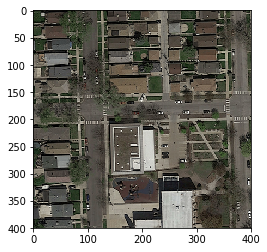

In [15]:
img = data[1]
plt.imshow(img)

(400, 400, 3)


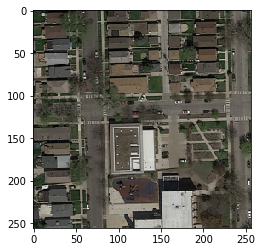

In [19]:
plt.imshow(resize_to_256(img))
print (img.shape)

# Divide in 4

In [43]:
def img_divide_in_4(img, size):
    """ Divide the image in 4 squares lrtb (left-right-top-bottom)
    im: input image
    size: size of wanted squares
    """
    if img.shape[0]<=size or img.shape[1]<=size:
        return [img,img,img,img]
    list_imgs= []
    imgwidth = img.shape[0]
    imgheight = img.shape[1]
    list_imgs.append(img[0:size, 0:size])
    list_imgs.append(img[0:size,  imgheight-size:imgheight])
    list_imgs.append(img[imgwidth-size:imgwidth, 0:size])
    list_imgs.append(img[imgwidth-size:imgwidth, imgheight-size:imgheight])
    return list_imgs

In [87]:
a,b,c,d = img_divide_in_4(img, size)

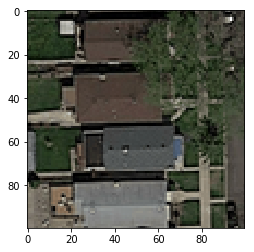

In [88]:
size = 100
plt.imshow(a)

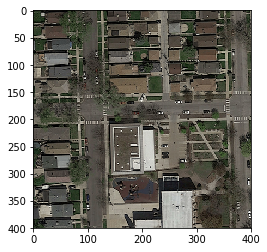

In [45]:
tmp = img_divide_in_4(img, size=400)
plt.imshow(tmp[0])

# rotations


In [46]:
from skimage import data
from skimage.transform import rotate
image = data.camera()
rotate(image, 2).shape

rotate(image, 2, resize=True).shape

rotate(image, 90, resize=True).shape


(512, 512)

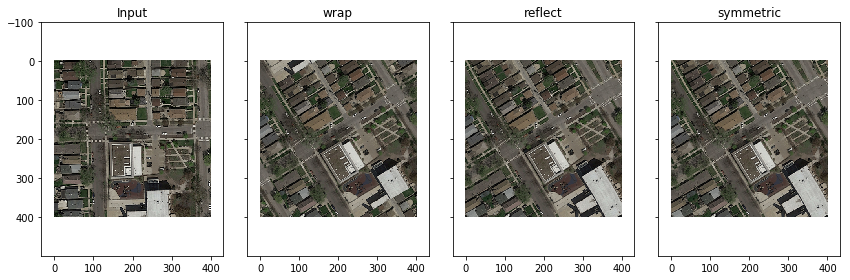

In [53]:
tmp1 = rotate(img,30,resize=False,mode='wrap')
tmp2 = rotate(img,30,resize=False,mode='reflect')
tmp3 = rotate(img,30,resize=False,mode='symmetric')

# plot
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(12,4))
ax[0].imshow(img)
ax[1].imshow(tmp1, aspect="auto")
ax[2].imshow(tmp2, aspect="auto")
ax[3].imshow(tmp3, aspect="auto")

ax[0].set_title("Input")
ax[1].set_title("wrap")
ax[2].set_title("reflect")
ax[3].set_title("symmetric")
fig.tight_layout()
#fig.savefig("output/roadSegmentation.png")


We thus choosed reflect (since i did not understood the difference between symmetric and reflect)

In [55]:
img[0,0,0]

0.1882353

In [86]:
tmp = rotate(img,0,resize=False,mode='wrap')
print (img.shape)
print (tmp.shape)
tmp[0,0,0]


(400, 400, 3)
(400, 400, 3)


0.18823529779911041

In [84]:
def rotate_my_img(img,random=True):
    if random == True:
        rotations = [30,60]
        angle = np.random.choice(rotations)
    else:
        angle = 45
    return rotate(img,angle,resize=False,mode='reflect')
    

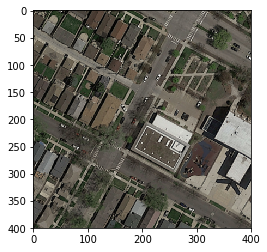

In [85]:
plt.imshow(rotate_my_img(img))

# For Training:


In [ ]:
def list_featured():
    